<a href="https://colab.research.google.com/github/nprimavera/Laser-Cutting/blob/main/FINAL_LASER_CUTTER_BOX_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Generating a Fractal - general usage

import matplotlib.pyplot as plt
import numpy as np

class Vector:                     # REMINDER: class --> defines the attributes and bahaviors of the vector
    def __init__(self, x, y):     # REMINDER: init function --> special method in a class that is called when an object is created - initializes object's attributes
        self.x = x                # instance variable for x
        self.y = y                # instance variable for y

class AffineTransform:
    def __init__(self, a, b, c, d, e, f):   # initializes object's attributes
        self.a = a    # instance variables
        self.b = b
        self.c = c
        self.d = d
        self.e = e
        self.f = f

def recursivePlot(vector, transforms, num_transforms, current_depth, max_depth, ax):  # recursive plot function w/ specified params
    if current_depth == max_depth:          # base case: current recursion depth equals maximum recursion depth
        ax.plot(vector.x, vector.y, 'ro')   # if true --> recursivePlot will plot the Vector with a call to ax.plot and return
        return

# apply affine transformations to the vector
    for transform in transforms:            # loops through all the transformations in the array
        new_x = transform.a * vector.x + transform.b * vector.y + transform.e
        new_y = transform.c * vector.x + transform.d * vector.y + transform.f
        new_vector = Vector(new_x, new_y)   # calculates a new vector for each transformation
        recursivePlot(new_vector, transforms, num_transforms, current_depth + 1, max_depth, ax)

def drawFractal(startPoint, transforms, max_depth):   # draws the fractal w/ specified params
    fig, ax = plt.subplots()                          # ax plot allows the function to plot on the same set of axes throughout its recursive calls
    num_transforms = len(transforms)                  # the number of transforms is equal to the amount/length of transforms - defined in usage
    recursivePlot(startPoint, transforms, num_transforms, 0, max_depth, ax)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Sierpinski triangle')
    ax.grid(True)
    plt.savefig('fractal.svg', format='svg')          # saves the fractal as an svg file

Enter the x-coordinate of the starting point (in inches, maximum 12): 5
Enter the y-coordinate of the starting point (in inches, maximum 18): 3


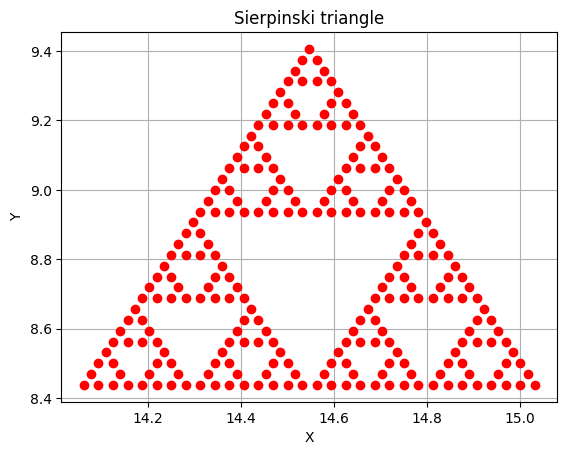

In [ ]:
# Example usage - using the Sierpinski triangle for this example

# Starting point of the fractal - from user input
def user_input():
    while True:
        try:
            x = int(input("Enter the x-coordinate of the starting point (in inches, maximum 12): ")) * 90   # 90 pixels per inch
            y = int(input("Enter the y-coordinate of the starting point (in inches, maximum 18): ")) * 90
            if 0 <= x <= 1080 and 0 <= y <= 1620:  # Check if coordinates are within constraints
                return Vector(x, y)
            else:
                print("Error: Coordinates must be within 12 inches for x and 18 inches for y.")
        except ValueError:
            print("Error: Invalid input. Please enter valid numerical values for coordinates.")

if __name__ == "__main__":
    startPoint = user_input()

    # Define transformations for Sierpinski triangle
    transforms = [
        AffineTransform(0.5, 0, 0, 0.5, 0, 0),   # Scale down by 1/2
        AffineTransform(0.5, 0, 0, 0.5, 0.5, 0), # Scale down by 1/2 and move right by 0.5
        AffineTransform(0.5, 0, 0, 0.5, 0.25, 0.5) # Scale down by 1/2, move right by 0.25, and up by 0.5
    ]

    # Calculate maximum recursion depth
    max_depth = 5

    # Execute the draw fractal function
    drawFractal(startPoint, transforms, max_depth)

In [2]:
# Define box variables based off user input
while True:   # user input for height - max = 18in
    try:
        box_height_inches = int(input("Enter the desired height of your box to the nearest whole inch (maximum 18 inches): "))
        if 1 <= box_height_inches <= 18:
            box_height = box_height_inches * 90
            break
        else:
            print("Error: Box height must be between 1 and 18 inches.")
    except ValueError:
        print("Error: Invalid input. Please enter a valid numerical value for the height.")

while True:   # user input for width - max =12in
    try:
        box_width_inches = int(input("Enter the desired width of your box to the nearest whole inch (maximum 12 inches): "))
        if 1 <= box_width_inches <= 12:
            box_width = box_width_inches * 90
            break
        else:
            print("Error: Box width must be between 1 and 12 inches.")
    except ValueError:
        print("Error: Invalid input. Please enter a valid numerical value for the width.")

# Constants
dovetail_width = 11
slot_width = 10  # Width of the slot
slot_height = 5  # Height of the slot
svg_filename = "dovetail_box.svg"
box = open(svg_filename, "w")
box.close

# Total rectangular box --> 12in x 18in acrylic
def drawBox(height, width, x_initial, y_initial):
    # Define corner points of the box
    x1 = x_initial
    y1 = y_initial
    x2 = x1
    y2 = y1 + height
    x3 = x1 + width
    y3 = y2
    x4 = x3
    y4 = y1

    # Define SVG file content
    svg_content = f'''
    <svg width="1080" height="1620" xmlns="http://www.w3.org/2000/svg">
        <rect x="{x_initial}" y="{y_initial}" width="{box_width}" height="{box_height}" fill="none" stroke="black" stroke-width="1"/>
    '''
    # Write SVG content to a file
    box = open(svg_filename, "a")   # "a" is code to append the file
    box.write(svg_content)
    box.close

# Sides of the box
def drawSide(height, width, x_initial, y_initial):
  for i in range(0, height, y_initial):
      x1 = x_initial
      x2 = x1 + x_initial
      x4 = x1 + width
      x3 = x4 - x_initial
      y1 = y_initial
      y2 = y1 + y_initial
      y4 = y2 + height
      y3 = y4 - y_initial
      side_content = f'''
      <polyline points = "{x1},{y1} {x2},{y1} {x2},{y2} {x3},{y2} {x3},{y1} {x4},{y1} {x4},{y3} {x3},{y3} {x3},{y4} {x2},{y4} {x2},{y3} {x1},{y3}" fill="none" stroke="black" stroke-width="1"/>
      '''
      # Append the svg file
      box = open(svg_filename, "a")
      box.write(side_content)
      box.close

# Top and Bottom of the box


# TSlots for the screws
def drawTSlot(height, width, x_initial, y_initial):
   for i in range(1, int(width / 180)):
      xa = int(180 - (0.5*90)) + i
      ya = y_initial + slot_height
      xb = xa
      yb = ya + 11
      xc = xa - 5
      yc = yb
      xd = xc
      yd = ya + 28
      xe = xa + 14
      ye = yd
      xf = xe
      yf = yb
      xg = xa + 9
      yg = yb
      xh = xg
      yh = ya
      slot_content = f'''
      <polyline points="{xa},{ya} {xb},{yb} {xc},{yc} {xd},{yd} {xe},{ye} {xf},{yf} {xg},{yg} {xh},{yh} " fill="none" stroke="black" stroke-width="1"/>
      </svg>
      '''
      # Append the svg file
      box = open(svg_filename, "a")
      box.write(slot_content)
      box.close

# Executes the function
if __name__ == "__main__":
    drawBox(box_height, box_width, 20, 20)
    drawTSlot(box_height, box_width, 20, 20)
    drawSide(box_height, box_width, 20, 20)

Enter the desired height of your box to the nearest whole inch (maximum 18 inches): 5
Enter the desired width of your box to the nearest whole inch (maximum 12 inches): 5
